In [1]:
%load_ext autotime
import warnings; warnings.filterwarnings('ignore')

In [2]:
import numpy as np, pandas as pd, geopandas as gpd
import matplotlib.pyplot as plt, glob
import matplotlib as mpl
import rasterio, xarray as xr
from rasterio import features
from lulc_utils import *

time: 583 ms


In [3]:
files = []
for i in np.arange(22):
    filename = './LULC_reclass/reclass_tif_%s/recls_%s.tif' % (i, i)
    files.append(filename)

time: 1.05 ms


In [15]:
base = '/mnt/ext1/data/sur/lulc/Decadal_LULC_India_1336/data/'
shapefile = '/home/pankaj/phd/practice/sur/data/neshpfile/NE_utm.shp'
mosfile  = './plots/mosaic.tif'
cropfile = './plots/clipped.tif'
resample = base + 'LULC_2015.tif'
files_string = " ".join(files)

time: 3.33 ms


In [9]:
def plot_raster(filename, ax=None, fig=None):
    colors = ['green', 'blue',  'magenta', 'yellow', 'white', 'black']
    cmap = mpl.colors.ListedColormap(colors)
    labels = pd.read_csv('labels.txt', header=None, sep='- ', \
                     names=['index', 'labels', 'new']).set_index('index')
    with rasterio.open(filename) as infile:
        img = infile.read(1) 
    for idx in labels.index:
        img[img==idx] = labels.loc[idx, 'new']
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=cmap)
    ax.axis('off')
    if fig:
        return fig, ax

time: 6.54 ms


In [6]:
!rm -f $mosfile; gdal_merge.py -co COMPRESS=LZW -o $mosfile -of gtiff -a_nodata 0 $files_string

0...10...20...30...40...50...60...70...80...90...100 - done.
time: 38.7 s


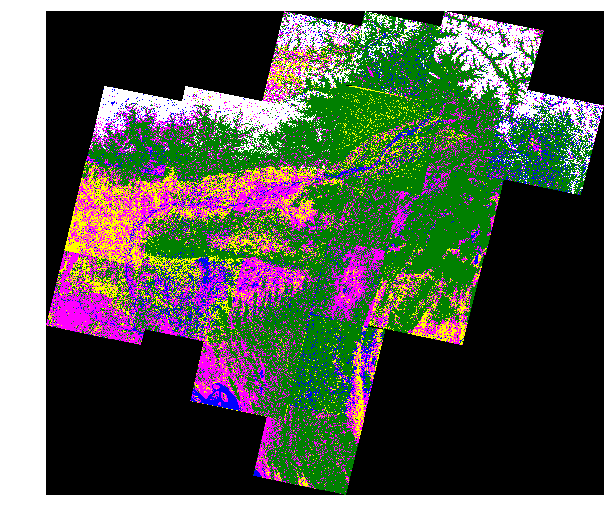

time: 41.6 s


In [10]:
fig, ax = plot_raster(mosfile)
plt.savefig('./plots/mosaic.png')
plt.show()

In [12]:
!rm -f $cropfile; gdalwarp -co COMPRESS=LZW -cutline $shapefile -crop_to_cutline -dstalpha $mosfile $cropfile

Creating output file that is 26618P x 25917L.
Processing input file ./plots/mosaic.tif.
Using internal nodata values (e.g. 0) for image ./plots/mosaic.tif.
Copying nodata values from source ./plots/mosaic.tif to destination ./plots/clipped.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.
time: 3min 53s


In [16]:
!rm -f $resample; gdal_translate -co COMPRESS=LZW -outsize 33% 33% -r nearest $cropfile $resample 

Input file size is 26618, 25917
0...10...20...30...40...50...60...70...80...90...100 - done.
time: 3.37 s


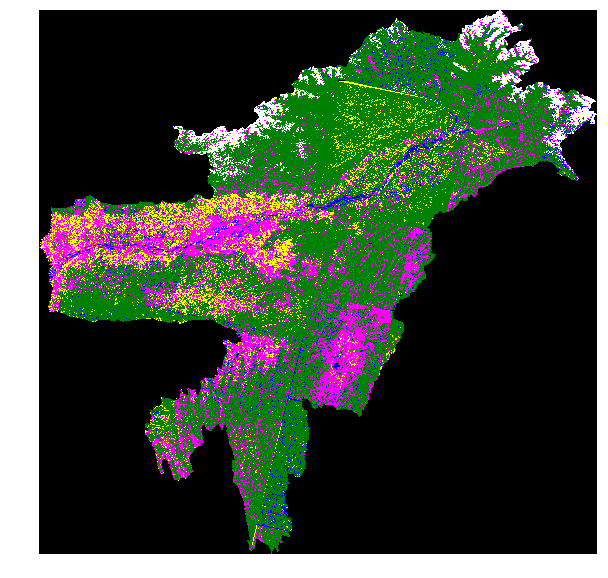

time: 3.36 s


In [17]:
fig, ax = plot_raster(resample)
plt.savefig('./plots/resample.png')
plt.show()